In [5]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import tqdm

In [194]:
import multiprocessing

In [6]:
import importlib

In [7]:
import boards

In [32]:
importlib.reload(boards);

In [33]:
b = boards.LinearBoard(3)


In [34]:
b = boards.LinearBoard(3)
b.board[0]=1
b.board[1]=2
b.board[2]=1
b.board[ b.ij_to_ind(1,0)] = 2
b.board[ b.ij_to_ind(2,0)] = 2
b.board[ b.ij_to_ind(1,1)] = 2
b.board[ b.ij_to_ind(2,1)] = 1
b.board[ b.ij_to_ind(1,2)] = 1
b.board[ b.ij_to_ind(2,2)] = 1
b.printBoard()

    0 1 2 
0  |X 0 X |
1  |0 0 X |
2  |0 X X |


In [35]:
B = boards.LinearBoard(3)
boards.simulate(B.board, B.masks)

(array([1, 2, 1, 1, 1, 2, 2, 1, 2]), 0)

In [36]:
b = boards.LinearBoard(n=4);
w = boards.simulate(b.board, b.masks, max_moves=20)[1]
b.printBoard()
print("winner = ", w)

    0 1 2 3 
0  |0 X 0 X |
1  |X X X 0 |
2  |X 0 0 0 |
3  |X 0 X 0 |
winner =  0


In [37]:
b = boards.LinearBoard(n=10);
w = boards.simulate(b.board, b.masks, max_moves=20)[1]
b.printBoard()
print("winner = ", w)

    0 1 2 3 4 5 6 7 8 9 
0  |                    |
1  |      0             |
2  |  0             X   |
3  |  0               0 |
4  |X       X X     0   |
5  |  0 X   0   0       |
6  |      X             |
7  |      X       0     |
8  |              X     |
9  |        X       0 X |
winner =  -1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:11<00:00, 877.92it/s]


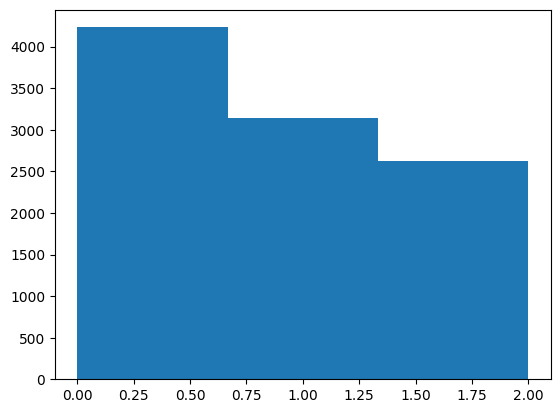

In [38]:
n = 4
B = boards.LinearBoard(n)
stats = [boards.simulate(boards.LinearBoard(n).board, B.masks, max_moves=1000)[1] for _ in tqdm.tqdm(range(10000))]
plt.hist(stats, bins=3);

In [39]:
B = boards.LinearBoard(5);
masks = B.masks
board, _ = boards.simulate(B.board, B.masks, max_moves=3)

In [40]:
moves = boards.getMoves(board)
moves_stats = np.zeros(len(moves))

In [42]:
for iMove in tqdm.tqdm(range(len(moves))):
    bb = board.copy()
    bb[ moves[iMove]] = 1
    boards_collection = np.tile(bb, (1000,1))
    mc = np.apply_along_axis(lambda b: boards.simulate(b, masks, max_moves=100)[1], 1, boards_collection)
    moves_stats[iMove] = np.mean(mc==1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:34<00:00,  1.57s/it]


In [162]:
def get_player_to_move(board):
    return 1 if np.sum(board==1) == np.sum(board==2) else 2

In [186]:
def find_best_MC_move(board, masks, mc_trials = 1000, max_moves = 100):
    player_to_move = get_player_to_move(board)
    next_player = 3 - player_to_move
    print("Finding best move for player ", player_to_move, "next one will be ", next_player)
    moves = boards.getMoves(board)
    print("There are ", len(moves), " possible moves")
    moves_stats = np.zeros(len(moves))
    for iMove in tqdm.tqdm(range(len(moves))):
        bb = board.copy()
        bb[ moves[iMove]] = player_to_move # making test move
        # MC the play with the opponent starting
        boards_collection = np.tile(bb, (mc_trials,1))
        mc = np.apply_along_axis(lambda b: boards.simulate(b, masks, player_to_move=next_player, max_moves=max_moves)[1], 1, boards_collection)
        moves_stats[iMove] = np.mean(mc==player_to_move)
    i_best_move = np.argmax(moves_stats)
    return moves[i_best_move], player_to_move, sorted([list(m) for m in zip(moves, moves_stat)], key= lambda r: -r[1])

In [ ]:
?fin

In [190]:
n = 5
board = np.zeros(n*n)
masks = boards.initMasks(n)
# boards.simulate(board, masks, max_moves=1)
boards.printBoard(board, n)

    0 1 2 3 4 
0  |          |
1  |          |
2  |          |
3  |          |
4  |          |


In [191]:
best_move, p, moves = find_best_MC_move(board, masks)
print("Best move for player ", p, " is ", best_move)
board[best_move] = p
boards.printBoard(board, n)

Finding best move for player  1 next one will be  2
There are  25  possible moves


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:52<00:00,  2.09s/it]

Best move for player  1  is  6
    0 1 2 3 4 
0  |          |
1  |  X       |
2  |          |
3  |          |
4  |          |


In [193]:
best_move, p, moves = find_best_MC_move(board, masks)
print("Best move for player ", p, " is ", best_move)
board[best_move] = p
boards.printBoard(board, n)

Finding best move for player  2 next one will be  1
There are  24  possible moves


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:51<00:00,  2.16s/it]

Best move for player  2  is  20
    0 1 2 3 4 
0  |          |
1  |  X       |
2  |          |
3  |          |
4  |0         |


In [192]:
moves

[[4, 0.681],
 [0, 0.605],
 [2, 0.602],
 [8, 0.598],
 [6, 0.587],
 [1, 0.559],
 [5, 0.555],
 [7, 0.534],
 [3, 0.513]]

In [185]:
sorted([list(m) for m in zip(moves, moves_stat)], key= lambda r: -r[1])

[[4, 0.681],
 [0, 0.605],
 [2, 0.602],
 [8, 0.598],
 [6, 0.587],
 [1, 0.559],
 [5, 0.555],
 [7, 0.534],
 [3, 0.513]]

In [131]:
best_move, p = find_best_move(board, masks)
print("Best move for player ", p, " is ", best_move)
board[best_move] = p
boards.printBoard(board, n)

Finding best move for player  2 next one will be  1
There are  15  possible moves


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:14<00:00,  1.00it/s]

Best move for player  2  is  5
    0 1 2 3 
0  |      X |
1  |  0     |
2  |        |
3  |        |


In [132]:
best_move, p = find_best_move(board, masks)
print("Best move for player ", p, " is ", best_move)
board[best_move] = p
boards.printBoard(board, n)

Finding best move for player  1 next one will be  2
There are  14  possible moves


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:12<00:00,  1.12it/s]

Best move for player  1  is  6
    0 1 2 3 
0  |      X |
1  |  0 X   |
2  |        |
3  |        |


In [125]:
best_move, p = find_best_move(board, masks)
print("Best move for player ", p, " is ", best_move)
board[best_move] = p
boards.printBoard(board, n)

Finding best move for player  2 next one will be  1
There are  6  possible moves


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.64it/s]

Best move for player  2  is  8
    0 1 2 
0  |X     |
1  |  X   |
2  |0   0 |


In [126]:
best_move, p = find_best_move(board, masks)
print("Best move for player ", p, " is ", best_move)
board[best_move] = p
boards.printBoard(board, n)

Finding best move for player  1 next one will be  2
There are  5  possible moves


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.72it/s]

Best move for player  1  is  7
    0 1 2 
0  |X     |
1  |  X   |
2  |0 X 0 |


In [127]:
best_move, p = find_best_move(board, masks)
print("Best move for player ", p, " is ", best_move)
board[best_move] = p
boards.printBoard(board, n)

Finding best move for player  2 next one will be  1
There are  4  possible moves


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.64it/s]

Best move for player  2  is  5
    0 1 2 
0  |X     |
1  |  X 0 |
2  |0 X 0 |


In [128]:
best_move, p = find_best_move(board, masks)
print("Best move for player ", p, " is ", best_move)
board[best_move] = p
boards.printBoard(board, n)

Finding best move for player  1 next one will be  2
There are  3  possible moves


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.47it/s]

Best move for player  1  is  1
    0 1 2 
0  |X X   |
1  |  X 0 |
2  |0 X 0 |


In [112]:
best_move, p = find_best_move(board, masks)
print("Best move for player ", p, " is ", best_move)
board[best_move] = p
boards.printBoard(board, n)

Finding best move for player  1 next one will be  2
There are  1  possible moves


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.67it/s]

Best move for player  1  is  5
    0 1 2 
0  |X 0 X |
1  |0 0 X |
2  |0 X X |


## -------

In [103]:
board[best_move] = 1;
moves = boards.getMoves(board)
moves_stats = np.zeros(len(moves))

In [137]:
for iMove in tqdm.tqdm(range(len(moves))):
    bb = board.copy()
    bb[ moves[iMove]] = 1
    boards_collection = np.tile(bb, (1000,1))
    mc = np.apply_along_axis(lambda b: boards.simulate(b, masks, player_to_move=2, max_moves=100)[1], 1, boards_collection)
    moves_stats[iMove] = np.mean(mc==2)

100%|███████████████████████████████████████████| 22/22 [00:34<00:00,  1.59s/it]


In [138]:
best_move = np.argmax(moves_stats)
best_move

15

In [139]:
board[best_move] = 2;
moves = boards.getMoves(board)
moves_stats = np.zeros(len(moves))

In [137]:
for iMove in tqdm.tqdm(range(len(moves))):
    bb = board.copy()
    bb[ moves[iMove]] = 1
    boards_collection = np.tile(bb, (1000,1))
    mc = np.apply_along_axis(lambda b: boards.simulate(b, masks, player_to_move=2, max_moves=100)[1], 1, boards_collection)
    moves_stats[iMove] = np.mean(mc==2)

100%|███████████████████████████████████████████| 22/22 [00:34<00:00,  1.59s/it]
